# Oil Viscosity predicted model from NMR log using Machine Learning

## Libraries

In [1]:
# Auto carga de scripts 
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from process_data import *
from plots import *

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
train_data, test_data, df = process_data()

## Exploring data

### Stats description

In [4]:
df.describe()

,T2lm (ms),Temperature (°F),TE (ms),Viscosity (cP),Temperature (K)
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,56.760992,145.716216,0.208243,12829.237875,145.716216
std,162.036179,79.925611,0.078059,60086.644328,79.925611
min,0.230000,78.800000,0.100000,0.870000,78.800000
25%,1.752545,86.000000,0.100000,38.238168,86.000000
50%,4.407970,122.000000,0.240000,442.495000,122.000000
75%,29.863601,185.450000,0.240000,3584.000000,185.450000
max,1239.900000,383.000000,0.300000,867634.810000,383.000000


### Distribution plots

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu S

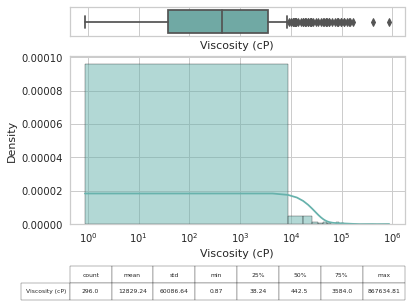

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


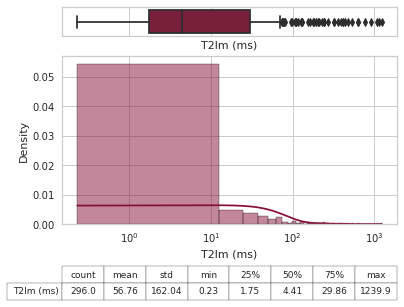

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


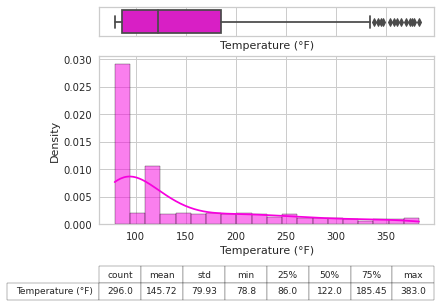

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


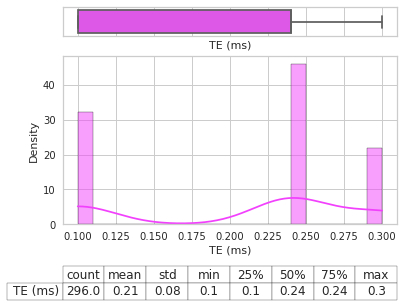

In [5]:
from plots import dist_box_stats

dist_box_stats(df, 'Viscosity (cP)', 'log', 100)
dist_box_stats(df, 'T2lm (ms)', 'log', 100)
dist_box_stats(df, 'Temperature (°F)', 'linear', 20)
dist_box_stats(df, 'TE (ms)', 'linear', 20)

### Pairplot

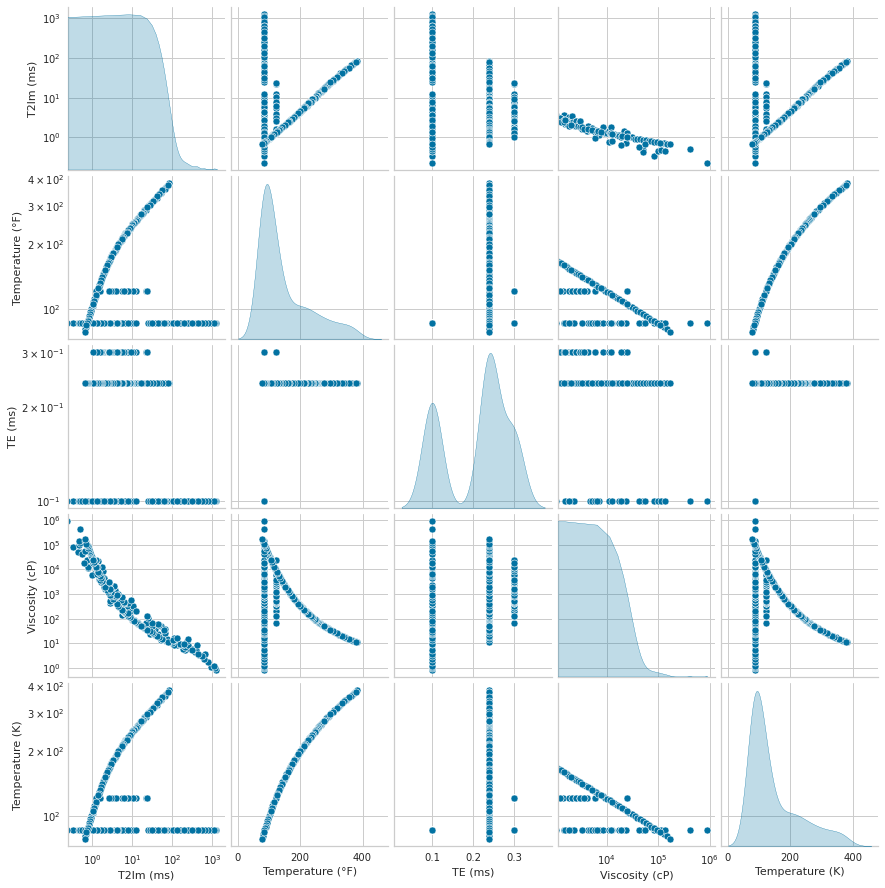

In [6]:
pplot(df)

### T2lm vs Viscosity plot

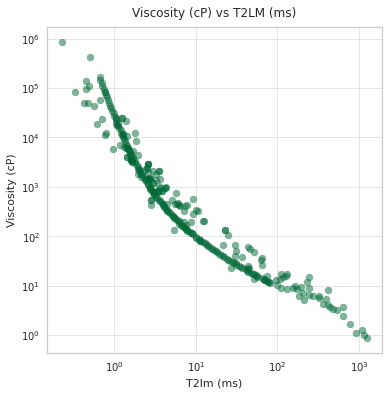

In [7]:
t2lm_visc(df)

### Correlation coeficient matrix plot - Spearman

In [8]:
df.columns

Index(['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'Viscosity (cP)',
       'Temperature (K)'],
      dtype='object')

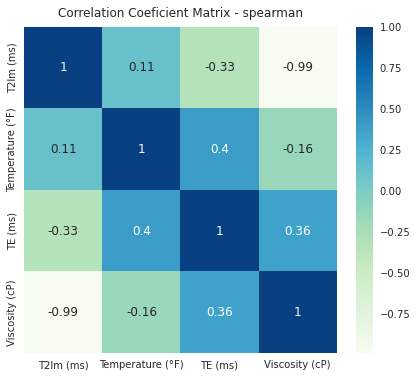

In [9]:
from plots import corr_plot

corr_plot(df[['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'Viscosity (cP)']], 'spearman', (7,6), 'df')

## Feature Engineering

In [10]:
def feature_eng(df):
    df_fe = df.copy()
    df_fe['log(T2lm)'] = np.log(df['T2lm (ms)'])
    df_fe['log(Temp)'] = np.log(df['Temperature (°F)'])
    df_fe['log(TE)'] = np.log(df['TE (ms)'])
    df_fe['log(T2lm)/TE'] = np.log(df['T2lm (ms)'])/df['TE (ms)']
    df_fe['log(T2lm)/Temp'] = np.log(df['T2lm (ms)'])/df['Temperature (°F)']
    df_fe['log(T2lm)/TE'] = np.log(df['T2lm (ms)'])/df['TE (ms)']
    df_fe['log(Temp)/TE'] = np.log(df['Temperature (°F)'])/df['TE (ms)']
    df_fe['log(TE)'] = np.log(df['TE (ms)'])
    df_fe['log(T2lm)'] = np.log(df['T2lm (ms)'])
    df_fe['1/log(T2lm)'] = 1/np.log(df['T2lm (ms)'])
    df_fe['1/log(Temp)'] = 1/np.log(df['Temperature (°F)'])
    df_fe['1/log(TE)'] = 1/np.log(df['TE (ms)'])

    return df_fe

df_fe = feature_eng(df)

## Machine Learning algoritms

In [11]:
#Librerias Preprocesamiento y analisis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#Librerias de Metricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

### Train Test Slip

In [12]:
df_fe.columns

Index(['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'Viscosity (cP)',
       'Temperature (K)', 'log(T2lm)', 'log(Temp)', 'log(TE)', 'log(T2lm)/TE',
       'log(T2lm)/Temp', 'log(Temp)/TE', '1/log(T2lm)', '1/log(Temp)',
       '1/log(TE)'],
      dtype='object')

In [137]:
X = df_fe[[
        'T2lm (ms)',
        'Temperature (°F)',
        'TE (ms)',
        # 'Temperature (K)',
        'log(T2lm)',
        'log(Temp)',
        'log(TE)',
        'log(T2lm)/TE',
        'log(T2lm)/Temp',
        'log(Temp)/TE',
        # '1/log(T2lm)',
        # '1/log(Temp)',
        # '1/log(TE)'
        ]]

y = np.log10(df_fe['Viscosity (cP)'])
# 
X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y.values,
                                                    test_size=0.30,
                                                    random_state=42)
print(X.columns)

Index(['T2lm (ms)', 'Temperature (°F)', 'TE (ms)', 'log(T2lm)', 'log(Temp)',
       'log(TE)', 'log(T2lm)/TE', 'log(T2lm)/Temp', 'log(Temp)/TE'],
      dtype='object')


### RandomForestRegressor - Feature Importance

============== Regression Metrics : RandomForestRegressor ===============
MAE_train: 4818.62		 MAE_test: 2155.3
RMSE_train: 40744.681819969686	 RMSE_test: 8849.617690417748
R²_train: 1.0			 R²_test: 0.98


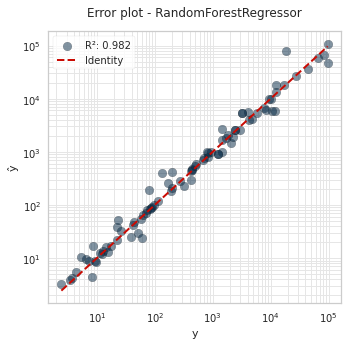

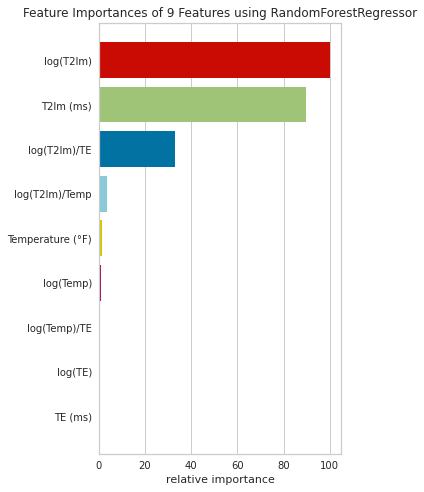

In [138]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(max_depth=10)

RFR.fit(X_train, y_train)

y_test_DTR = RFR.predict(X_test)
y_train_DTR = RFR.predict(X_train)

regression_metrics('RandomForestRegressor', y_train, y_train_DTR, y_test, y_test_DTR)
regression_plots(y_test, y_test_DTR, 'RandomForestRegressor')
feature_importance(RFR, X, y)


### Feature Selection

In [114]:
X = df_fe[[
        # 'T2lm (ms)',
        # 'Temperature (°F)',
        # 'TE (ms)',
        # 'Temperature (K)',
        'log(T2lm)',
        # 'log(Temp)',
        # 'log(TE)',
        'log(T2lm)/TE',
        'log(T2lm)/Temp',
        'log(Temp)/TE',
        # '1/log(T2lm)',
        # '1/log(Temp)',
        '1/log(TE)'
        ]]
# 
y = np.log10(df_fe['Viscosity (cP)'])

X_train, X_test, y_train, y_test = train_test_split(
        X.values,
        y.values,
        test_size=0.30,
        random_state=42
        )
        
print(X.columns)

Index(['log(T2lm)', 'log(T2lm)/TE', 'log(T2lm)/Temp', 'log(Temp)/TE',
       '1/log(TE)'],
      dtype='object')


### Multilinear regresor

============== Regression Metrics : Linear Regression ===============
MAE_train: 11561.53		 MAE_test: 3829.77
RMSE_train: 64549.4905752957	 RMSE_test: 13552.889536563007
R²_train: 0.94			 R²_test: 0.94


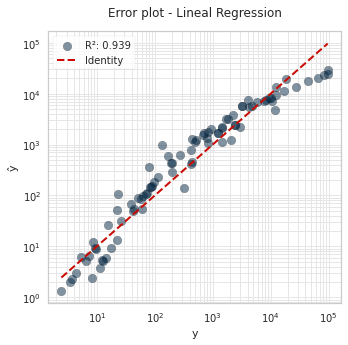

In [115]:
from sklearn.linear_model import LinearRegression

MLR = LinearRegression()

MLR.fit(X_train, y_train)
y_test_MLR = MLR.predict(X_test)
y_train_MLR = MLR.predict(X_train)

regression_metrics('Linear Regression', y_train, y_train_MLR, y_test, y_test_MLR)
regression_plots(y_test, y_test_MLR, 'Lineal Regression')

### K-Nearest Neighbors for Regression

============== Regression Metrics : K-Nearest Neighbors ===============
MAE_train: 7052.81		 MAE_test: 1291.46
RMSE_train: 54378.07023974648	 RMSE_test: 4121.4733836058895
R²_train: 0.99			 R²_test: 0.98


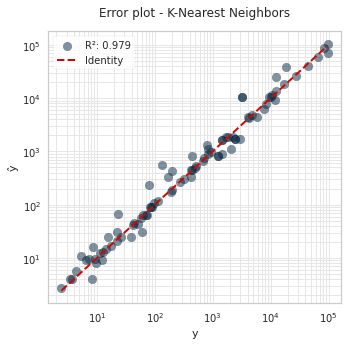

In [116]:
from sklearn import neighbors

KNN = neighbors.KNeighborsRegressor(n_neighbors = 3)

KNN.fit(X_train, y_train)
y_test_KNN = KNN.predict(X_test)
y_train_KNN = KNN.predict(X_train)

regression_metrics('K-Nearest Neighbors', y_train, y_train_KNN, y_test, y_test_KNN)
regression_plots(y_test, y_test_KNN, 'K-Nearest Neighbors')


### Support Vector Machine

============== Regression Metrics : SVR_rbf ===============
MAE_train: 5186.86		 MAE_test: 1240.03
RMSE_train: 28730.59475227957	 RMSE_test: 3569.594508412198
R²_train: 0.99			 R²_test: 0.98


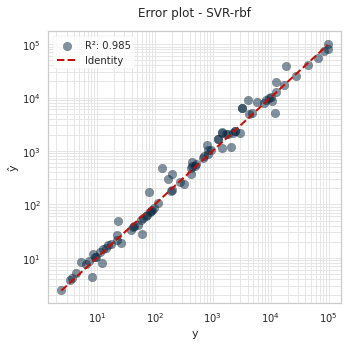

In [117]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=128, degree=1, tol=0.01, epsilon=0.05)

SVR_model.fit(X_train, y_train)
y_test_SVR = SVR_model.predict(X_test)
y_train_SVR = SVR_model.predict(X_train)

regression_metrics('SVR_rbf', y_train, y_train_SVR, y_test, y_test_SVR)
regression_plots(y_test, y_test_SVR, 'SVR-rbf')

### Decision Tree Regressor

============== Regression Metrics : DecisionTreeRegressor ===============
MAE_train: 4225.61		 MAE_test: 3190.34
RMSE_train: 22988.408900219503	 RMSE_test: 12451.493426933603
R²_train: 0.99			 R²_test: 0.97


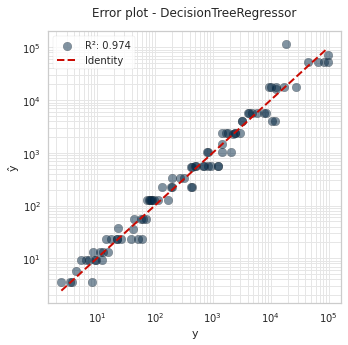

In [118]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5)

DTR.fit(X_train, y_train)

y_test_DTR = DTR.predict(X_test)
y_train_DTR = DTR.predict(X_train)

regression_metrics('DecisionTreeRegressor', y_train, y_train_DTR, y_test, y_test_DTR)
regression_plots(y_test, y_test_DTR, 'DecisionTreeRegressor')


### Neural Network

============== Regression Metrics : MLPR ===============
MAE_train: 4097.48		 MAE_test: 1215.98
RMSE_train: 23908.521626335212	 RMSE_test: 5370.021735915634
R²_train: 0.99			 R²_test: 0.98


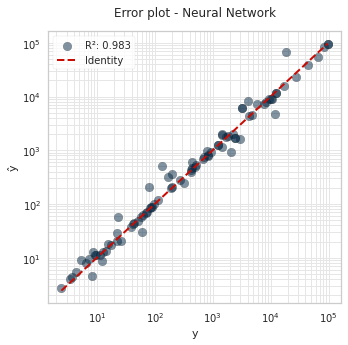

In [119]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(
    activation='logistic',
    alpha=1e-05,
    # hidden_layer_sizes=(1, 2, 2,2),
    random_state=42,
    solver='lbfgs')

MLPR.fit(X_train, y_train)
y_test_MLPR = MLPR.predict(X_test)
y_train_MLPR = MLPR.predict(X_train)

regression_metrics('MLPR', y_train, y_train_MLPR, y_test, y_test_MLPR)
regression_plots(y_test, y_test_MLPR, 'Neural Network')

## Preview Models

In [120]:
# from preview_model import *
# data = test_data.append([train_data])

# for i in [Morris, Vinegar, Straley, Lo, Zhang, Cheng, Sandor]:
#     i(df)

## Validation with Colombian oil data

In [121]:
well_data = well_log_data()

In [122]:
# triple_combo_plot(well_data, 8150,8350)
# visc_well()

In [127]:
well_val = pd.DataFrame(
    data = {
        'T2lm (ms)': 64.3017,
        'Temperature (°F)': 198.7,
        'TE (ms)': 0.35,
        'Viscosity (cP)': 120.167,
        'Temperature (K)': 365.76111
        },
        index=[0])

well_val_fe = feature_eng(well_val)

X_val = well_val_fe[X.columns].values
y_val = well_val_fe['Viscosity (cP)'].values


print('Multi linear regression model\t', f'Real data: {y_val}\t', f'Predicted data: {10**MLR.predict(X_val)}')
print('K-Nearest Neighbors model\t', f'Real data: {y_val}\t', f'Predicted data: {10**KNN.predict(X_val)}')
print('Support Vector Regressor model\t', f'Real data: {y_val}\t', f'Predicted data: {10**SVR_model.predict(X_val)}')
print('Decision Tree Regressor model\t', f'Real data: {y_val}\t', f'Predicted data: {10**DTR.predict(X_val)}')
print('Multilayer Perceptron model\t', f'Real data: {y_val}\t', f'Predicted data: {10**MLPR.predict(X_val)}')

Multi linear regression model	 Real data: [120.167]	 Predicted data: [3.88245235]
K-Nearest Neighbors model	 Real data: [120.167]	 Predicted data: [105.87546946]
Support Vector Regressor model	 Real data: [120.167]	 Predicted data: [127.83095493]
Decision Tree Regressor model	 Real data: [120.167]	 Predicted data: [23.58969257]
Multilayer Perceptron model	 Real data: [120.167]	 Predicted data: [93.09746392]


In [92]:
from preview_model import *

# for i in [Morris, Vinegar, Straley, Lo, Zhang, Cheng, Sandor]:
#     i(well_val)


In [128]:
metrics_ml = pd.DataFrame({
'Model': [
    'Linear Regresion',
    'K-Nearest Neighbors',
    'Support Vector Machine',
    'Decision Tree Regressor'
    ],
'R2':[
    r2_score((y_test), (y_test_MLR)).round(3),
    r2_score((y_test), (y_test_KNN)).round(3),
    r2_score((y_test), (y_test_SVR)).round(3),
    r2_score((y_test), (y_test_DTR)).round(3)
    ],
'RMSE':[
    ((mean_squared_error(10**(y_test), 10**(y_test_MLR)))**(0.5)).round(1),
    ((mean_squared_error(10**(y_test), 10**(y_test_KNN)))**(0.5)).round(1),
    ((mean_squared_error(10**(y_test), 10**(y_test_SVR)))**(0.5)).round(1),
    ((mean_squared_error(10**(y_test), 10**(y_test_DTR)))**(0.5)).round(1)
    ], 
'MAE':[
    mean_absolute_error(10**(y_test), 10**(y_test_MLR)).round(1),
    mean_absolute_error(10**(y_test), 10**(y_test_KNN)).round(1),
    mean_absolute_error(10**(y_test), 10**(y_test_SVR)).round(1),
    mean_absolute_error(10**(y_test), 10**(y_test_DTR)).round(1)
    ]
}
).set_index('Model')

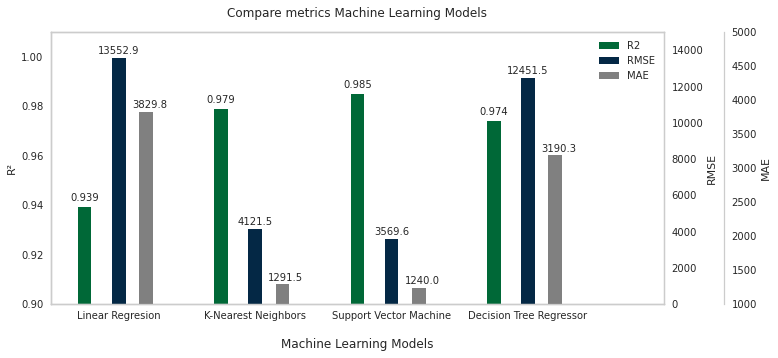

In [129]:
compare_ml(metrics_ml, 'ml')

In [163]:
y_morris, y_1 = Morris_model(df)
y_vinegar, y_2 = Vinegar_model(df)
y_lo, y_3 = Lo_model(df)
y_zhang, y_4 = Zhang_model(df)
y_sandor, y_5 = Sandor_model(df)
y_cheng, y_6 = Cheng_model(df)

metrics_prev = pd.DataFrame({
'Model': [
    # 'Morris',
    'Vinegar',
    'Lo',
    'Zhang',
    'Cheng',
    'Sandor',
    'Support Vector Machine',],
'R2':[
    # 0.33,
    0.31,
    0.6,
    0.52,
    0.6,
    0.863,
    r2_score((y_test), (y_test_SVR)).round(3)
    ],
'RMSE':[
    # (mean_squared_error(y_1, y_morris)**0.5).round(1),
    (mean_squared_error(y_2, y_vinegar)**0.5).round(1),
    (mean_squared_error(y_3, y_lo)**0.5).round(1),
    (mean_squared_error(y_4, y_zhang)**0.5).round(1),
    (mean_squared_error(y_5, y_sandor)**0.5).round(1),
    (mean_squared_error(y_6, y_cheng)**0.5).round(1),
    ((mean_squared_error(10**(y_test), 10**(y_test_SVR)))**(0.5)).round(1)],
'MAE':[
    # mean_absolute_error(y_1, y_morris).round(1),
    mean_absolute_error(y_2, y_vinegar).round(1),
    mean_absolute_error(y_3, y_lo).round(1),
    mean_absolute_error(y_4, y_zhang).round(1),
    mean_absolute_error(y_5, y_sandor).round(1),
    mean_absolute_error(y_6, y_cheng).round(1),
    mean_absolute_error(10**(y_test), 10**(y_test_SVR)).round(1)]
}).set_index('Model')

metrics_prev.sort_values(by='R2', ascending=True, inplace=True)

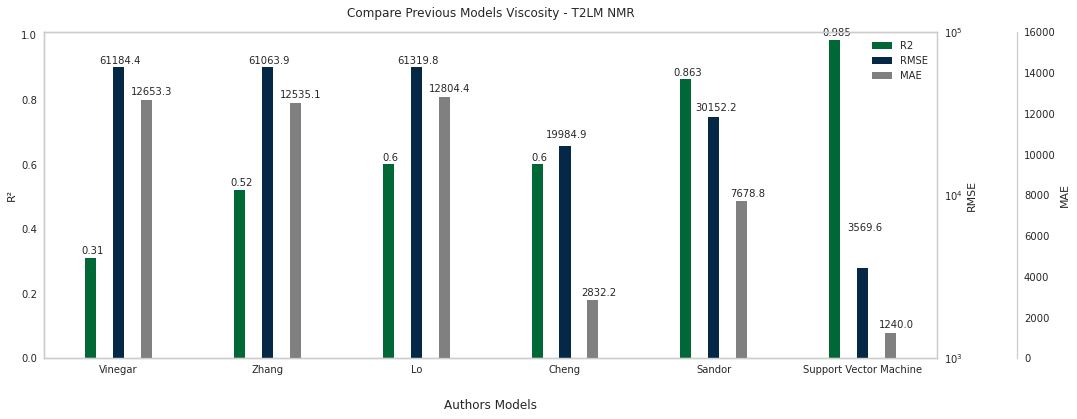

In [173]:
compare_prev(metrics_prev, 'previus_model')

In [165]:
from preview_model import *

error = pd.DataFrame({
    'Model':
        ['Linear Regresion',
        'K-Nearest Neighbors',
        'Support Vector Machine',
        'Decision Tree Regressor',
        # 'Morris',
        'Vinegar',
        'Lo',
        'Zhang',
        'Cheng',
        'Sandor'],
    'error':
        [abs(10**MLR.predict(X_val)-y_val)[0],
        abs(10**KNN.predict(X_val)-y_val)[0],
        abs(10**SVR_model.predict(X_val)-y_val)[0],
        abs(10**DTR.predict(X_val)-y_val)[0],
        # abs(Morris_model(well_val_fe) - y_val)[0],
        abs(Vinegar_model(well_val_fe) - y_val)[0],
        abs(Lo_model(well_val_fe) - y_val)[0],
        abs(Zhang_model(well_val_fe)- y_val)[0],
        abs(Sandor_model(well_val_fe) - y_val)[0],
        abs(Cheng_model(well_val_fe)- y_val)[0]]
                    }
                ).set_index('Model')

error.sort_values(by='error', ascending=False, inplace=True)

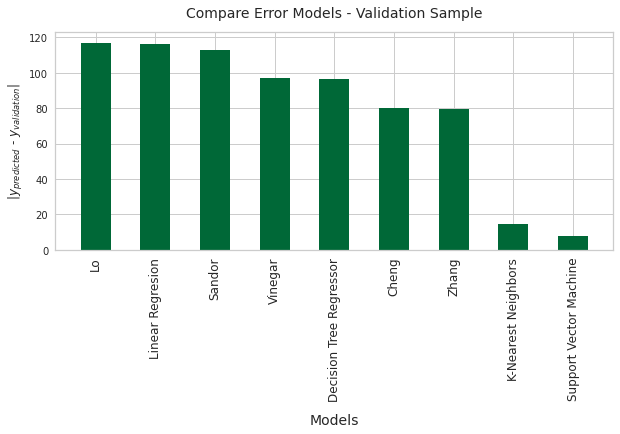

In [166]:
fig,ax = plt.subplots(figsize=(10,4))
plt.title('Compare Error Models - Validation Sample', pad=15, size=14)
labels = error.index.tolist()
width = 0.5
x = np.arange(len(labels))
ax.bar(
    x,
    abs(error['error']),
    width=width,
    color='#006837',
    align='center', 
    )

ax.set_ylabel(r'|$y_{predicted}$ - $y_{validation}$|', size=12)
ax.set_xlabel('Models', size=14)
ax.xaxis.set_label_coords(0.5, -0.75)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontdict={'fontsize':12}, rotation=90)
plt.savefig(f'../reports/figures/compare_validation.png', dpi=500, bbox_inches='tight', transparent = True)

plt.show();